# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## C-SVM with standard parameters
### Use C-SVMs to solve the “XOR”-classification problem

In [2]:
# generate train and test data
def generateData(mean1, mean2, var, no):
    cov = np.array([[var, 0], [0, var]])
    N1 = np.random.multivariate_normal(mean1, cov, no)
    N2 = np.random.multivariate_normal(mean2, cov, no)
    data = np.zeros(N1.shape)
    for i in range(N1.shape[0]):
        idx = np.random.uniform()
        if idx<0.5:
            data[i] = N1[i]
        else:
            data[i] = N2[i]
    return data

In [3]:
train0 = generateData([0,1], [1,0],0.1, 40)
train1 = generateData([0,0], [1,1],0.1, 40)
train = np.concatenate((train0, train1), axis = 0)
labelsTrain = np.array([40*[0] + 40*[1]]).T

In [4]:
test0 = generateData([0,1], [1,0],0.1, 40)
test1 = generateData([0,0], [1,1],0.1, 40)
test = np.concatenate((test0, test1), axis = 0)
labelsTest = np.array([40*[0] + 40*[1]]).T

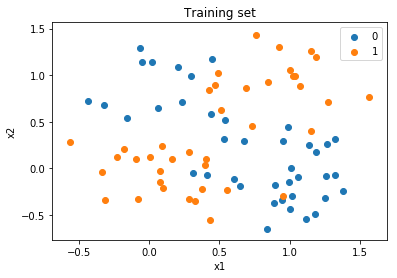

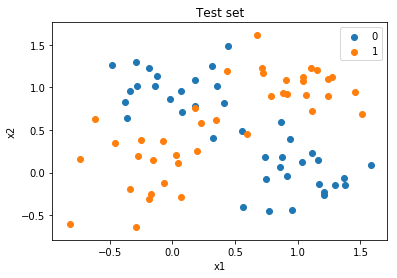

In [5]:
plt.scatter(train[:40, 0], train[:40, 1], label='0')
plt.scatter(train[40:, 0], train[40:, 1], label='1')
plt.xlabel('x1'); plt.ylabel('x2'); plt.legend(); plt.title("Training set"); plt.show()
plt.scatter(test[:40, 0], test[:40, 1], label='0')
plt.scatter(test[40:, 0], test[40:, 1], label='1')
plt.xlabel('x1'); plt.ylabel('x2'); plt.legend(); plt.title("Test set"); plt.show()

### Train SVM classifier

In [6]:
clf = SVC()
clf.fit(train, labelsTrain.reshape((80,)))
predictions = np.array(clf.predict(test)).reshape((80,1))
acc = len(np.where(predictions==labelsTest)[0])/80
testError = 1 - acc
print ("Test error = {}".format(testError))

Test error = 0.09999999999999998


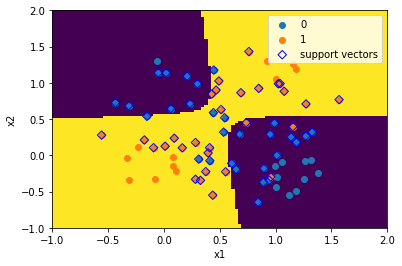

In [7]:
svs = clf.support_vectors_ 
x, y = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
predict = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        p = clf.predict([[x[i, j], y[i, j]]])
        predict[i, j] = p

plt.pcolor(x, y, predict)
plt.scatter(train[:40, 0], train[:40, 1], label='0')
plt.scatter(train[40:, 0], train[40:, 1], label='1')
plt.scatter(svs[:,0], svs[:,1], facecolors='none', edgecolors='b', marker='D', label='support vectors')
plt.xlabel('x1'); plt.ylabel('x2'); plt.legend(); plt.show()